Author: Mozah Alismail

# Analyze Students Performance Data with R Language

## 0. About Data

### Read Dataset Description

We want to predict students performance in math in secondary education of two high schools. Please read the description of data set before start.

 [Dataset Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

### Import data

<p>
here link of raw data set: <a href="https://raw.githubusercontent.com/Ruqyai/Course-DS/master/math-raw.csv"> here</a>.
</p>

## 1. Load the Data

### Load the data

In [1]:
data <- read.csv("math-raw.csv", stringsAsFactors = TRUE) # Load the data

In [2]:
# Explore the data by displaying the first 10 rows
head(data,10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,?,4,1,1,3,NaN,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,?,3,1,1,3,NaN,5,5,6
3,GP,Female,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,Male,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
7,GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
8,,,NA,,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
9,,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19


### Explore Data dimentions

In [3]:
paste ("The data has", dim(data)[1], "rows and", dim(data)[2], "columns.")

[1] "The data has 395 rows and 33 columns."

### Explore Data structure

In [4]:
"Data structure: "
str(data)

[1] "Data structure: "

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 3 levels "","GP","MS": 2 2 2 2 2 2 2 1 1 1 ...
 $ sex       : Factor w/ 5 levels "","F","Female",..: 2 2 3 2 2 5 4 1 4 4 ...
 $ age       : int  18 17 15 15 16 16 16 NA 15 15 ...
 $ address   : Factor w/ 3 levels "","R","U": 3 3 3 3 3 3 3 1 3 3 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  NA NA 3 0 0 0 0 0 0 0 ...
 $ sc

### Explore Data summary

In [5]:
"Data summary: "
summary(data)

[1] "Data summary: "

 school       sex           age       address famsize   Pstatus      Medu      
   : 22         :  1   Min.   :15.0    :  1   GT3:281   A: 41   Min.   :0.000  
 GP:327   F     :206   1st Qu.:16.0   R: 88   LE3:114   T:354   1st Qu.:2.000  
 MS: 46   Female:  1   Median :17.0   U:306                     Median :3.000  
          M     :186   Mean   :16.7                             Mean   :2.749  
          Male  :  1   3rd Qu.:18.0                             3rd Qu.:4.000  
                       Max.   :22.0                             Max.   :4.000  
                       NA's   :1                                               
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reput

Notes: 
- There is 22 students theier schools is not define in 'school' attribute.
- There is error in 'sex' attribute section, as there is some of them were define as 'Female' and other as 'F' but they both are females, and same for males.
- there is some missing values define as Na's
- there is two missing values in 'freetime' attribute define as '?'

In [6]:
# replace '?' with NA in 'freetime' column
data$freetime <- replace(data$freetime, data$freetime == "?" , NA)

## 2. Clean the Data

### 1. Deal with Missing Values

Identify and handle missing values

In [7]:
# TODO: Identify the missing values

# Check the number missing values 
sum_of_missing_values <- sum(is.na(data) | data == "")
paste("The Number of missing Data is :", as.character(sum_of_missing_values))

# Define missing values for each column (more detailed) 
missing_values <- colSums(is.na(data) | data == "")
print(missing_values)

[1] "The Number of missing Data is : 33"

    school        sex        age    address    famsize    Pstatus       Medu 
        22          1          1          1          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         2          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          2          0          0          0 
    health   absences         G1         G2         G3 
         0          2          2          0          0 


In [8]:
# load the tidyverse package
# to use ggplot functions from the ggplot2 package
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


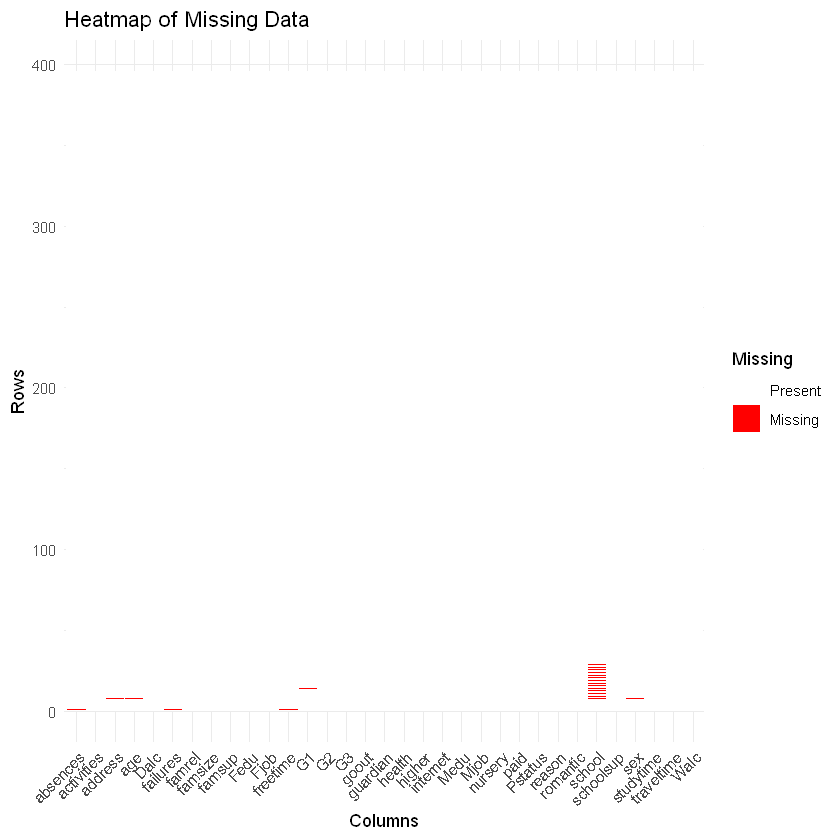

In [9]:
# TODO: Draw heatmap for missing value

# Create a logical matrix for missing values (NA or "")
missing_matrix <- is.na(data) | data == ""

# Convert the matrix to a data frame and add row names for easier labeling
missing_df <- as.data.frame(missing_matrix)
missing_df$row <- rownames(missing_df)

# Reshape to long format
missing_long <- pivot_longer(missing_df, cols = -row, names_to = "Columns", values_to = "Missing")

# Convert row numbers to numeric for the plot
missing_long$row <- as.numeric(missing_long$row)

# Plot the heatmap using ggplot
ggplot(missing_long, # data
  aes(x = Columns, y = row, fill = Missing)) + # aesthetics (x-axis, y-axis, fill)
  geom_tile(color = "white") + # tile color
  scale_fill_manual(values = c("FALSE" = "white", "TRUE" = "red"), labels = c("Present", "Missing")) + # fill color
  labs(title = "Heatmap of Missing Data", x = "Columns", y = "Rows") + # labels
  theme_minimal() + # theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotate x-axis labels

In [10]:
# TODO: Delete all missing value

# Remove row as its school column has missing values
data_clean <- data[!(is.na(data$school) | data$school == ""), ]


In [11]:
# TODO: Check missing values again

# Check the number missing values 
sum_of_missing_values2 <- sum(is.na(data_clean) | data_clean == "")
paste("The Number of missing Data is :", as.character(sum_of_missing_values2))

# Define missing values for each column (more detailed) 
missing_values2 <- colSums(is.na(data_clean) | data_clean == "")
print(missing_values2)

[1] "The Number of missing Data is : 6"

    school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         2          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          2          0          0          0 
    health   absences         G1         G2         G3 
         0          2          0          0          0 


Note:

- 'failures' , 'freetime', and 'absences' colums still has missing values

In [12]:
# Replace the missing values in the 'failures' column with the median of the column

# Calculate the median of the 'failures' column
failures_median <- median(data$failures, na.rm = TRUE)

# Replace the missing values with the median
data_clean$failures[is.na(data_clean$failures)] <- failures_median

# Check the number missing values in the 'failures' column 
missing_values_failures <- sum(is.na(data_clean$failures) | data_clean$failures == "")
paste("the number of missing values in failures column is: ",missing_values_failures)

[1] "the number of missing values in failures column is:  0"

In [13]:
# Replace the missing values in the 'freetime' column with the mode of the column

# Calculate the mode of the 'freetime' column
freetime_mode <- as.numeric(names(sort(table(data$freetime), decreasing = TRUE)[1]))

# Replace the missing values with the mode
data_clean$freetime[is.na(data_clean$freetime)] <- freetime_mode

# Check the number missing values in the 'freetime' column
missing_values_freetime <- sum(is.na(data_clean$freetime) | data_clean$freetime == "")
paste("the number of missing values in freetime column is: ",missing_values_freetime)

[1] "the number of missing values in freetime column is:  0"

In [14]:
# Replace the missing values in the 'absences' column with the mean of the column

# Calculate the mean of the 'absences' column
absences_mean <- mean(data$absences, na.rm = TRUE)

# Replace the missing values with the mean
data_clean$absences[is.na(data_clean$absences)] <- absences_mean

# Check the number missing values in the 'absences' column
missing_values_absences <- sum(is.na(data_clean$absences) | data_clean$absences == "")
paste("the number of missing values in absences column is: ",missing_values_absences)

[1] "the number of missing values in absences column is:  0"

In [15]:
# Check missing values again

# Check the number missing values 
sum_of_missing_values3 <- sum(is.na(data_clean) | data_clean == "")
paste("The Number of missing Data is :", as.character(sum_of_missing_values3))

# Define missing values for each column (more detailed) 
missing_values3 <- colSums(is.na(data_clean) | data_clean == "")
print(missing_values3)

[1] "The Number of missing Data is : 0"

    school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         0          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          0          0          0          0 
    health   absences         G1         G2         G3 
         0          0          0          0          0 


Finally, there is no missing values

### 2. Correct data format

In [16]:
# TODO: Check each coulmn type of class
print(sapply(data_clean, class))

    school        sex        age    address    famsize    Pstatus       Medu 
  "factor"   "factor"  "integer"   "factor"   "factor"   "factor"  "integer" 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
 "integer"   "factor"   "factor"   "factor"   "factor"  "integer"  "integer" 
  failures  schoolsup     famsup       paid activities    nursery     higher 
 "integer"   "factor"   "factor"   "factor"   "factor"   "factor"   "factor" 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
  "factor"   "factor"  "integer"   "factor"  "integer"  "integer"  "integer" 
    health   absences         G1         G2         G3 
 "integer"  "numeric"  "integer"  "integer"  "integer" 


In [17]:
# TODO: Change type of column that need to change

# change freetime column from factor to integer
data_clean$freetime <- as.integer(data_clean$freetime)

# change absences column from numeric to integer
data_clean$absences <- as.integer(data_clean$absences)

In [18]:
# TODO: Check each coulmn type of again
print(sapply(data_clean, class))

    school        sex        age    address    famsize    Pstatus       Medu 
  "factor"   "factor"  "integer"   "factor"   "factor"   "factor"  "integer" 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
 "integer"   "factor"   "factor"   "factor"   "factor"  "integer"  "integer" 
  failures  schoolsup     famsup       paid activities    nursery     higher 
 "integer"   "factor"   "factor"   "factor"   "factor"   "factor"   "factor" 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
  "factor"   "factor"  "integer"  "integer"  "integer"  "integer"  "integer" 
    health   absences         G1         G2         G3 
 "integer"  "integer"  "integer"  "integer"  "integer" 


In [19]:
str(data_clean)

'data.frame':	373 obs. of  33 variables:
 $ school    : Factor w/ 3 levels "","GP","MS": 2 2 2 2 2 2 2 2 2 2 ...
 $ sex       : Factor w/ 5 levels "","F","Female",..: 2 2 3 2 2 5 4 4 4 4 ...
 $ age       : int  18 17 15 15 16 16 16 16 15 15 ...
 $ address   : Factor w/ 3 levels "","R","U": 3 3 3 3 3 3 3 3 3 3 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 1 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 2 2 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 4 4 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 4 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 5 2 4 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 4 4 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 4 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 1 1 2 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ scho

### 3. Remove any duplicates


In [20]:
# TODO: Remove any duplicates in the data

data_clean <- unique(data_clean)

### 4. Data Standardization

In [21]:
unique(data_clean$sex)

[1] F      Female Male   M     
Levels:  F Female M Male

In [22]:
# Standardize sex column to "male" and "female"
data_clean$sex <- tolower(data_clean$sex)
data_clean$sex <- replace(data_clean$sex, data_clean$sex == "f", "female")
data_clean$sex <- replace(data_clean$sex, data_clean$sex == "m", "male")


In [23]:
unique(data_clean$sex)

[1] "female" "male"

## 3. Exploratory Data Analysis (EDA) and Data Visualization


Categorical variables are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.


### Deal with Outliers

In [24]:
summary(data_clean)

 school       sex                 age        address famsize   Pstatus
   :  0   Length:373         Min.   :15.00    :  0   GT3:265   A: 37  
 GP:327   Class :character   1st Qu.:16.00   R: 87   LE3:108   T:336  
 MS: 46   Mode  :character   Median :17.00   U:286                    
                             Mean   :16.76                            
                             3rd Qu.:18.00                            
                             Max.   :22.00                            
      Medu            Fedu             Mjob           Fjob            reason   
 Min.   :0.000   Min.   :0.000   at_home : 59   at_home : 20   course    :140  
 1st Qu.:2.000   1st Qu.:2.000   health  : 29   health  : 15   home      :100  
 Median :3.000   Median :2.000   other   :135   other   :204   other     : 34  
 Mean   :2.721   Mean   :2.496   services: 96   services:106   reputation: 99  
 3rd Qu.:4.000   3rd Qu.:3.000   teacher : 54   teacher : 28                   
 Max.   :4.000   Max.  

Note: 

In the 'absences' column,: 
- the third quartile (Q3) is 8.
- the maximum value is 75. 

Since this maximum value is significantly higher than Q3, it indicates potential outliers.

#### Identify Outliers

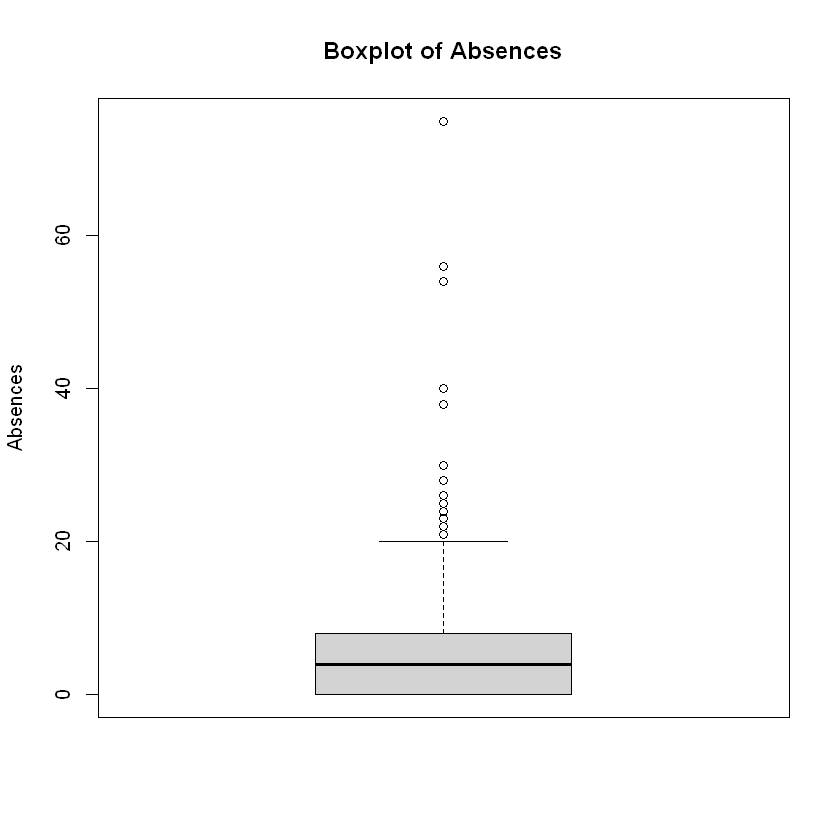

In [25]:
# TODO: Draw boxplot for coulmns that has outlier

boxplot(data_clean$absences, main="Boxplot of Absences", ylab="Absences")


The outliers shown clearly in the above boxplot.

#### Remove Outliers

In [26]:
# TODO: Remove outliers

data_clean$absences <- pmin(pmax(data_clean$absences, 0), 20)

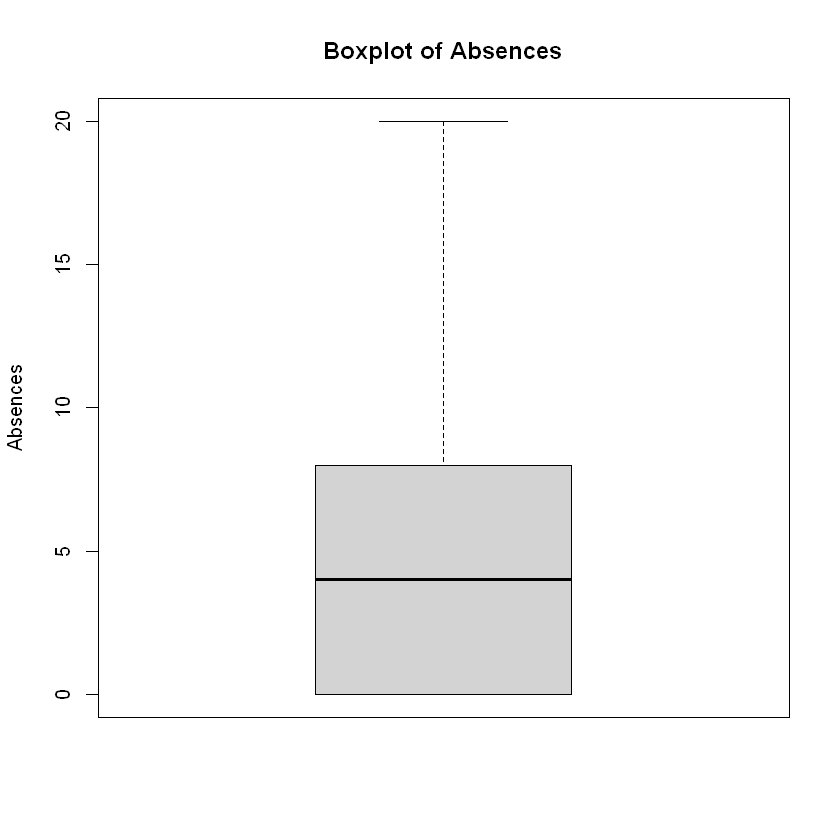

In [27]:
# TODO: Draw boxplot again
boxplot(data_clean$absences, main="Boxplot of Absences", ylab="Absences")

The outlires has been removed as illustrated in the above boxplot

### Looking for Correlations

In [28]:
data_clean

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<fct>,<chr>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,GP,female,18,U,GT3,A,4,4,at_home,teacher,⋯,4,4,4,1,1,3,5,5,6,6
2,GP,female,17,U,GT3,T,1,1,at_home,other,⋯,5,4,3,1,1,3,5,5,5,6
3,GP,female,15,U,LE3,T,1,1,at_home,other,⋯,4,4,2,2,3,3,10,7,8,10
4,GP,female,15,U,GT3,T,4,2,health,services,⋯,3,3,2,1,1,5,2,15,14,15
5,GP,female,16,U,GT3,T,3,3,other,other,⋯,4,4,2,1,2,5,4,6,10,10
6,GP,male,16,U,LE3,T,4,3,services,other,⋯,5,5,2,1,2,5,10,15,15,15
7,GP,male,16,U,LE3,T,2,2,other,other,⋯,4,5,4,1,1,3,0,12,12,11
30,GP,male,16,U,GT3,T,4,4,teacher,teacher,⋯,4,5,5,5,5,5,16,10,12,11
31,GP,male,15,U,GT3,T,4,4,health,services,⋯,5,5,2,3,4,5,0,9,11,12


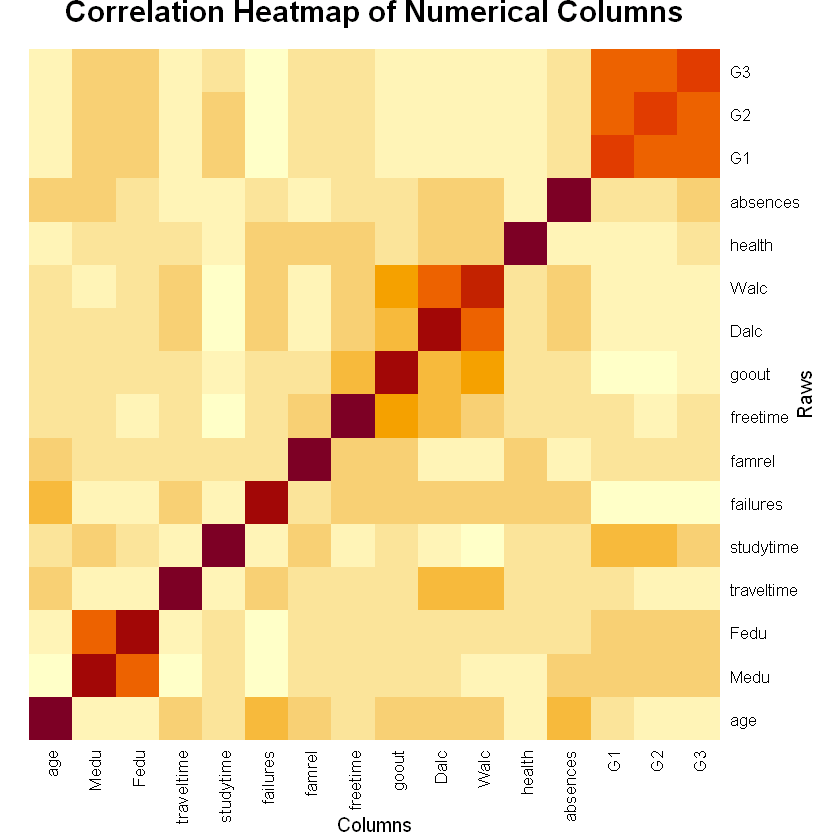

In [29]:
# TODO: Draw heatmap for numarical coulmns to show the correlation

correlation_matrix <- cor(data_clean[, sapply(data_clean, is.numeric)], use = "complete.obs")

# Plot the heatmap
heatmap(correlation_matrix,
        Rowv = NA, 
        Colv = NA,
        main = "Correlation Heatmap of Numerical Columns",
        xlab = "Columns",
        ylab = "Raws")

Notes:
- G1, G2, and G3 are highly correlated
- Dalc and Walc are highly correlated
- Medu and Fedu are highly correlated

## 4. Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the house price.

### Select features

In [30]:
# TODO: Calculate max min and mean for G3 column

# max
max_G3 <- max(data_clean$G3)
paste("G3 max is: ", max_G3)

# min
min_G3 <- min(data_clean$G3)
paste("G3 min is: ", min_G3)

# mean
mean_G3 <- mean(data_clean$G3)
paste("G3 mean is: ", mean_G3)

[1] "G3 max is:  20"

[1] "G3 min is:  0"

[1] "G3 mean is:  10.3163538873995"

In [31]:
# TODO: Print columns names

colnames(data_clean)

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

In [32]:
# TODO: Select which columns have strong relashionship with G3 column

# G3 are correlated with G1, G2, Fedu, Medu, studytime, famrel, freetime, and absences
# High correlation with G1, G2
# Midem correlated with Fedu, Medu, studytime, and absences
selected_columns <- c("G1", "G2", "Fedu", "Medu", "studytime", "famrel", "freetime", "absences")

data_selected <- data_clean[, selected_columns]

data_selected

,G1,G2,Fedu,Medu,studytime,famrel,freetime,absences
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,5,6,4,4,2,4,4,5
2,5,5,1,1,2,5,4,5
3,7,8,1,1,2,4,4,10
4,15,14,2,4,3,3,3,2
5,6,10,3,3,2,4,4,4
6,15,15,3,4,2,5,5,10
7,12,12,2,2,2,4,5,0
30,10,12,4,4,2,4,5,16
31,9,11,4,4,2,5,5,0


In [33]:
# TODO: Extract these columns in a new dataframe

write.csv(data_selected, "math-clean.csv", row.names = FALSE)